In [ ]:
!pip install matplotlib

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import re

from math import pi
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sentiment Analysis에 필요한 패키지 Import 


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'

!apt --qq -y install fonts-NanumBarunGothic

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)

# 그래프에 retina display 적용

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')  
fm._rebuild()

E: Command line option --qq is not understood in combination with the other options


구글 드라이브와 Colab을 연동합니다.

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

# 구글드라이브 마운트 

Mounted at /content/gdrive/


In [ ]:
os.listdir('gdrive/My Drive/pytest')
# 지정된 경로에 파일을 출력 

['Sentiment Analysis Dataset.csv',
 'iris.csv',
 'test.csv',
 'ratings_morphed.txt',
 '김소월시.txt',
 '윤동주시.txt',
 'ratings.txt',
 'wiki_test.txt',
 'negative.txt',
 'positive.txt',
 'ratings_small.txt',
 'kor-eng',
 '네이버뉴스-생활문화_다중',
 'word2vec',
 'aclImdb_v1_small',
 'similarity',
 'fra-eng',
 'rathings_morphed.txt',
 'rathings.txt',
 'stopwords-ko.txt',
 '크롤링 20000개.csv',
 '학대별 라벨.xlsx',
 'bert',
 '위험별 척도 유형 200개씩.xlsx',
 'Child_Abuser.csv',
 '위험 척도 유형별 (1000개) .csv',
 '위험 척도 유형 (해당없음 제거) .csv',
 '학대별 라벨-중복제거.xlsx',
 '위험 척도 유형 (해당없음 제거) .gsheet',
 '학대별 라벨_500개씩.csv',
 '학대유형척도.xlsx',
 'real_학대유형척도 (1).xlsx',
 'real_학대유형척도.xlsx',
 'Child_Abuser_score.csv',
 'Replace_Child.csv',
 '학대심각성 및 지속성_6분류_최종.xlsx',
 '학대심각성 및 지속성_6분류_최종1.xlsx',
 '학대심각성 및 지속성_6분류3.xlsx',
 'Novel_Author_Classification',
 '실데이터.xlsx']

In [ ]:
df = pd.read_excel('gdrive/My Drive/pytest/학대심각성 및 지속성_6분류3.xlsx')
# 지정된 구글드라이브의 파일을 불러오기 

In [ ]:
df.isnull().sum()

번호       0
내용       0
Label    0
dtype: int64

In [ ]:
df = df.drop(['번호'], axis = 1)

In [ ]:
df = df.loc[df['Label'] > 4]

In [ ]:
df.value_counts()

내용                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
df.columns

Index(['내용', 'Label'], dtype='object')

In [ ]:
df['Label'].unique()
# 반응변수들의 고유한 범위를 파악 

array([6, 5])

In [ ]:
df['Label'].value_counts()
# 이거 논문에 개수 적기 

6    307
5    305
Name: Label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


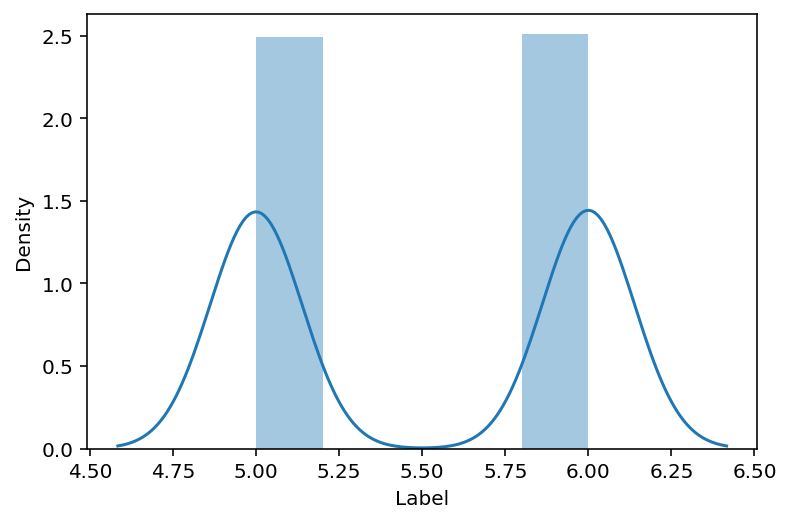

In [ ]:
import seaborn as sns
sns.distplot(df.Label)

In [ ]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
     |████████████████████████████████| 19.4MB 262kB/s 
     |████████████████████████████████| 460kB 41.4MB/s 
     |████████████████████████████████| 92kB 8.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ bash -x
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 

In [ ]:
import konlpy
konlpy.tag.Mecab().morphs('아버지가방에들어가신다')

['아버지', '가', '방', '에', '들어가', '신다']

In [ ]:
list1 = df.values.tolist()
# 불러왔던 df를 list형태로 변환해주며 list1이라는 객체에 저장 

In [ ]:
def text_cleaning(doc):
    
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", str(doc))
        
    return doc

# 함수지정 
# 분석하고자 하는 텍스트에서 한글만을 추출 

In [ ]:
def text_tokenizing(doc):
  return [word for word in mecab.nouns(doc) if word not in SW and len(word) > 1]

In [ ]:
# def text_tokenizing(doc):
#     return [word 
#             for word in rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) if word not in SW and len(word) > 1]

# # 함수지정 
# # 형태소 분석기인 Rhino사용
# # 추가적으로 형태소분석을 한 결과가 불용어사전에 들어있거나 글자수가 1개이하인 결과들은 삭제 
# # Bert를 사용하지 않으면 이것을 사용하고 Bert는 tokenizing을 하지 않는 것이 좋은 결과를 내기 때문에 tokenizing을 사용하지 않음

In [ ]:
def define_stopwords(path):
    
    SW = set() 
    #집합형태로 만들어줘야 중복을 제외하고 출력해줌
    #불용어들을 추가할려면 SW.add()이렇게 넣어주면 됨
    
    with open(path, encoding = 'cp949') as f:
        for word in f:
            SW.add(word)
            
    return SW

# 함수지정 
# 불용어사전을 만들어주는 함수(for문을 통해 set형태로 하나씩 넣어줌)

SW = define_stopwords('gdrive/My Drive/pytest/stopwords-ko.txt')
# 지정한 함수를 활용하여 구글드라이브에 불용어를 넣어놓은 텍스트파일을 불러옴 

In [ ]:
# !apt-get update
# !apt-get install g++ openjdk-8-jdk

# # JDK Install 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [49.8 kB]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:15 h

In [ ]:
# !pip install JPype1==0.7.4
# !pip install rhinoMorph
# # JPype Install 
# # 형태소 분석기 Rhino 사용 

     |████████████████████████████████| 2.9MB 7.8MB/s 
     |████████████████████████████████| 3.0MB 7.5MB/s 


In [ ]:
# import rhinoMorph
# rn = rhinoMorph.startRhino()
# # 설치된 Rhino를 임포트하고 시작하는 명어 

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!


In [ ]:
# def text_tokenizing(doc):
#     return [word 
#             for word in rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) if word not in SW and len(word) > 1]

# # 함수지정 
# # 형태소 분석기인 Rhino사용
# # 추가적으로 형태소분석을 한 결과가 불용어사전에 들어있거나 글자수가 1개이하인 결과들은 삭제 
# # Bert를 사용하지 않으면 이것을 사용하고 Bert는 tokenizing을 하지 않는 것이 좋은 결과를 내기 때문에 tokenizing을 사용하지 않음

In [ ]:
a = []
for i in SW:
  a.append(i.replace("\n",""))
# 지정된 불용어사전이 \n이 추가되어 있기때문에 없애주는 작업 

In [ ]:
a
# \n이 없어진것을 확인 

['부류의 사람들',
 '할수있다',
 '칠',
 '쉿',
 '누구',
 '그러한즉',
 '어떻하',
 '사',
 '이곳',
 '만 못하다',
 '기준으로',
 '다른 방면으로',
 '연관되다',
 '그때',
 '실로',
 '내공',
 '설마',
 '한 이유는',
 '조차도',
 '를',
 '하여금',
 '총적으로 말하면',
 '의해되다',
 '앞의것',
 '즉시',
 '예컨대',
 '더군다나',
 '주룩주룩',
 '이 밖에',
 '이때',
 '것과 같이',
 '등등',
 '아울러',
 '이러한',
 '와 같은 사람들',
 '만은 아니다',
 '쾅쾅',
 '삼',
 '헉',
 '여전히',
 '그렇지',
 '그러나',
 '너희',
 '이천팔',
 'ㅋ',
 '하기보다는',
 '하지만',
 '하자마자',
 '가령',
 '않기 위해서',
 '생각한대로',
 '어느때',
 '비록',
 '총적으로 보면',
 '가',
 '잠시',
 '이용하여',
 '해서는 안된다',
 '하는 김에',
 '넷',
 '영',
 '붕붕',
 '우리들',
 '그리하',
 '좍좍',
 '고려하면',
 '비길수 없다',
 '에서',
 '와르르',
 '봐',
 '바꿔 말하면',
 '어찌하여',
 '어떤',
 '이르기까지',
 '딱',
 '이로 인하여',
 '참',
 '따라서',
 '더욱이는',
 '그에 따르는',
 '혹은',
 '에',
 'ㅠㅠ',
 '이천육',
 '하여야',
 '막론하고',
 '엄마',
 '당장',
 '에 달려 있다',
 '아이',
 '앗',
 '허허',
 '여섯',
 '딩동',
 '의지하여',
 '쿵',
 '이유만으로',
 '혹시',
 '엉엉',
 '그럼',
 '대하면',
 '제',
 '해도된다',
 '향해서',
 '다시말하면',
 '저기',
 '관계가 있다',
 '우선',
 '하곤하였다',
 '상대적으로 말하자면',
 '이 되다',
 '펄렁',
 '하는것만 못하다',
 '근거로',
 '동시에',
 '예',
 '그',
 '습니다',
 '이런',
 '구',
 '여기',
 '까지',

In [ ]:
b = ['저희', '정도', '그때', '때문', '자기']
for i in b:
  a.append(i)

In [ ]:
SW = set(a)

In [ ]:
SW = SW.add('\n')

In [ ]:
list1

[['아동복지법위반 조사 받는 중 질문 드립니다.\xa0아이돌봄 교사로 일한지 3년째입니다일하는 것에 만족한 것도 많았지만 불만족스러운 것도 많았습니다돌봄 아이들 중에는 말을 잘 듣는 아이도 있고 안 듣는 아이도 있어서각기 아이들 성향에 맞추어 놀아주기도 학업을 도와 주기도 하였는데그 중 너무 산만하여 계속 흥분하여 뛰어다니는 아이에게 흥분을 가라앉히는 방법으로벽에 서서 20까지 세고 움직이도록 하였습니다.일종의 훈육 이였고 그 정도 훈육은 아이의 정서 발달에도 도움이 될 거라 판단하였습니다.그런데 또래 아이들이 집에 가며 저 친구는 선생님께 혼만 나는 아이라는 얘기를 듣고잘못 이해를 하셨는지 혼난 아이 부모님에게 혼난 사실을 말하여\xa0아동복지법위반으로 조사를 받게 되었습니다.아이들의 시선이 다 제각각 이여서 말을 전달하는 것 또한 제각각 전달되는 것을 알고\xa0전혀 사실과 다르다고 진술하고 있는 중입니다.어떤 아이는 제가 그 아이에게 손을 들고 있으라 했다고 하고어떤 아이는 고추를 잡고 서 있으라 했다고 하고 여러 정황이 나왔으나정확한 증거는 없는 상황이고 저는 아니라고 주장하는 상황입니다.어떻게 대처를 해야 하는지 답변 좀 부탁드립니다.',
  6],
 ['정서학대로 아동기관에서 처분이 내려지고경찰조사를 받았는데 아동복지법위반으로처분결과로 아동보호사건송치가 나왔습니다앞으로 어떻게 진행되며 마무리는 어떻게되는지? 또 아동보호사건 송치도 취업에제한이 있는지 경력에 뜨는지 궁금합니다',
  6],
 ['제가 미성년자와 오픈채팅방에서 합의 하에 음란한 대화를 주고 받았는데요. 저는 아직 만 18세이고 올해 만 19세가 되는데 만약 아동복지법 위반 조사를 받는다면 부모님이 있으셔야 하나요? 부모님이 모르시게 할 수는 없는 건가요? 그리고 음란영상이나 사진은 전혀 없이 대화만 했는데 처벌 수위는 어느정도 일까요? 벌금형 정도 일까요? 실형은 아니겠죠?   관련태그: 성범죄 관련키워드: 미성년자, 합의, 아동복지법',
  6],
 ['저희 형이 아동복지법 위반으로

In [ ]:
#텍스트 클리닝과 텍스트 토큰화
from konlpy.tag import Mecab
# from konlpy.tag import Kkma
# from konlpy.tag import 
# from konlpy.tag import Okt 
import json
import os
import re
from pprint import pprint

# okt = Okt()
mecab = Mecab()
# kkma = Kkma()

SW = define_stopwords('gdrive/My Drive/pytest/stopwords-ko.txt') # 불용어들을 SW에 저장 


if os.path.exists('train_docs4.json'): #op.path.exists() 어떤 파일이 디렉토리에 있는지 확인하는 함수 있으면 true출력
    with open("train_docs4.json", encoding='utf-8') as f: #if를 만족하면 파일을 불러올 수 있다 
        train_data = json.load(f)
else:
    #토큰화와 클리닝까지 
    #투플은 리스트와 비슷하지만 값은 변경할 수 없다 
    #line[1]을 토큰화하는 이유는 line[1]에 리뷰가 존재
    #클리닝을 먼저하고 토큰화를 하는게 좋다 
    train_data =[(text_tokenizing(text_cleaning(line[0])), line[1])for line in list1 if text_tokenizing(text_cleaning(line[0]))]
    #클리닝을 넣고 토큰화진행  
    #이게 토큰화만 수행하는 코드 train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])] if뒤에는 만약 ㅋㅋㅋ같은거는 토큰화하면 날라가므로 그러면 거기에는 빈 리스트만 존재하니깐 그걸 방지하기 위해
    
    with open("train_docs4.json", 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent='\t')
        
# if os.path.exists('test_docs.json'):
#     with open("test_docs.json", encoding='utf-8') as f:
#         test_data = json.load(f)
# else:
#     test_data = [(text_tokenizing(text_cleaning(line[1])), line[2]) for line in test_docs if text_tokenizing(text_cleaning(line[1]))]
#     #test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
#     with open("test_docs.json", 'w', encoding='utf-8') as f:
#         json.dump(test_data, f, ensure_ascii=False, indent='\t')

# pprint(train_data[0])
# pprint(test_data[0])

In [ ]:
len(train_data)

612

In [ ]:
train_data[:10]

[(['아동',
   '복지',
   '법위',
   '조사',
   '질문',
   '교사',
   '만족',
   '불만족',
   '아이',
   '아이',
   '아이',
   '아이',
   '성향',
   '학업',
   '흥분',
   '아이',
   '흥분',
   '방법',
   '서서',
   '일종',
   '훈육',
   '정도',
   '훈육',
   '아이',
   '정서',
   '발달',
   '도움',
   '판단',
   '또래',
   '아이',
   '친구',
   '선생',
   '아이',
   '얘기',
   '이해',
   '아이',
   '부모',
   '사실',
   '아동',
   '복지',
   '법위',
   '조사',
   '아이',
   '시선',
   '여서',
   '전달',
   '전달',
   '사실',
   '진술',
   '아이',
   '아이',
   '아이',
   '고추',
   '정황',
   '정확',
   '증거',
   '상황',
   '주장',
   '상황',
   '대처',
   '답변'],
  6),
 (['정서',
   '학대',
   '아동',
   '기관',
   '처분',
   '경찰',
   '조사',
   '아동',
   '복지',
   '법위',
   '처분',
   '결과',
   '아동',
   '보호사',
   '건송',
   '진행',
   '마무리',
   '아동',
   '보호',
   '사건',
   '송치',
   '취업',
   '제한',
   '경력'],
  6),
 (['미성년자',
   '오픈',
   '채팅',
   '합의',
   '음란',
   '대화',
   '올해',
   '만약',
   '아동',
   '복지',
   '위반',
   '조사',
   '부모',
   '부모',
   '건가요',
   '음란',
   '영상',
   '사진',
   '대화',
   '처벌',
   '수위',
   '정도',
   '벌금형',
   '정도'

In [ ]:
import nltk 
total_tokens = [token for doc in train_data for token in doc[0]]
print(len(total_tokens))

35408


In [ ]:
text = nltk.Text(total_tokens, name = 'token')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(30))

4448
[('아이', 781),
 ('엄마', 644),
 ('선생', 564),
 ('아빠', 545),
 ('신고', 523),
 ('아동', 488),
 ('친구', 342),
 ('학교', 336),
 ('정도', 293),
 ('저희', 291),
 ('학대', 285),
 ('생각', 282),
 ('부모', 264),
 ('경찰', 255),
 ('사람', 255),
 ('조사', 227),
 ('시간', 213),
 ('학생', 206),
 ('처벌', 198),
 ('동생', 186),
 ('소리', 184),
 ('상황', 181),
 ('머리', 181),
 ('아동학', 179),
 ('여자', 173),
 ('공부', 152),
 ('학원', 150),
 ('관련', 143),
 ('문제', 142),
 ('학년', 136)]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_

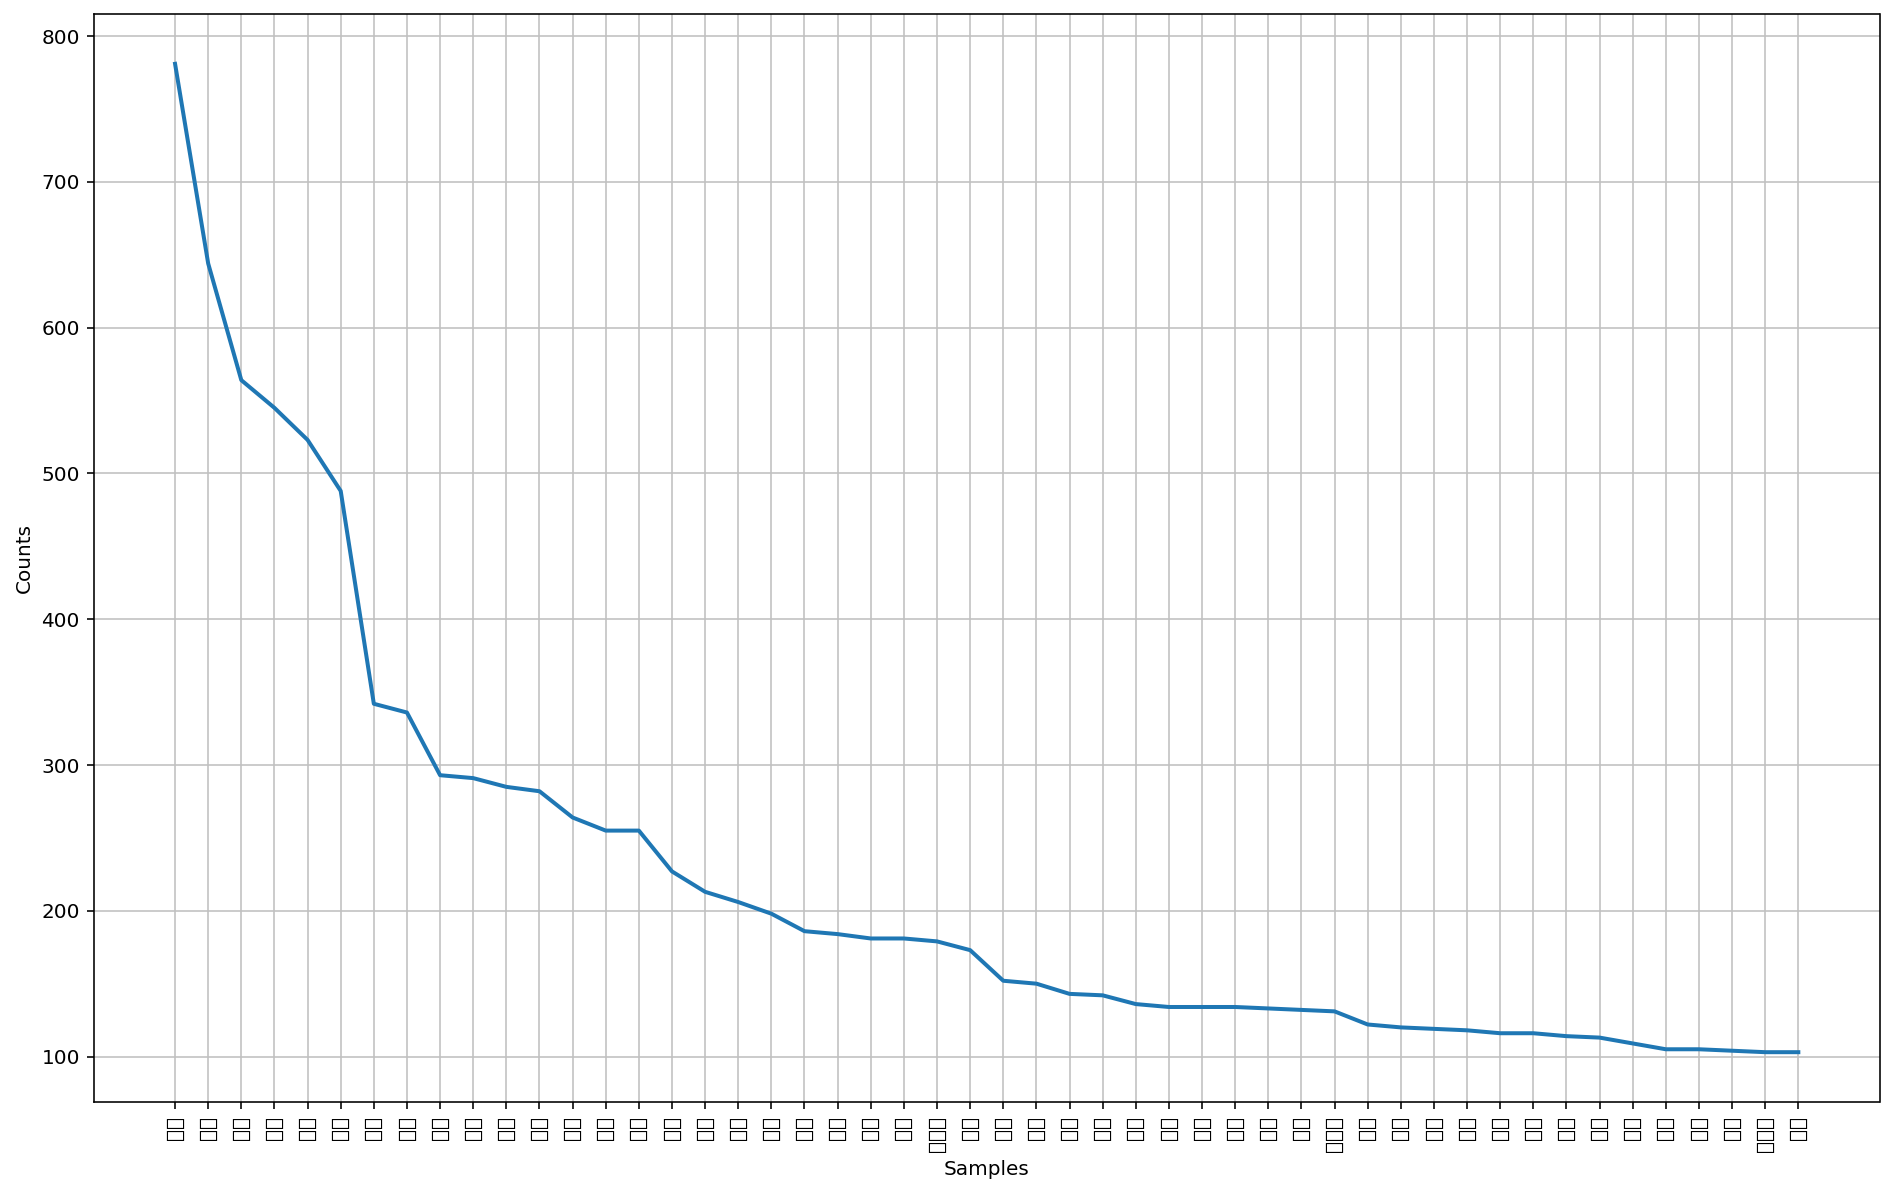

In [ ]:
import matplotlib.pyplot as plt
import platform 
from matplotlib import font_manager, rc 
%matplotlib inline

plt.figure(figsize = (16, 10))
text.plot(50)

In [ ]:
# y = []
# for line in train_data:
#   y.append(line[1])
# y = np.array(y)

In [ ]:
Senti = []
for line in train_data:
  Senti.append(line[1])
# 반응변수를 for문을 통해서 Senti라는 새롭게 만든 리스트에 넣어줌

In [ ]:
Senti = pd.DataFrame(Senti)

Senti.rename(columns = { 0 : 'Label'}, inplace = True)
# Senti의 컬럼이름을 변경해줌 

In [ ]:
labels = Senti['Label']
# labels에 Senti를 저장 
classes = sorted(labels.unique())
# classes에 Senti의 고유한 값을 저장 

In [ ]:
label_to_cat = dict()
# 빈 딕셔너리 생성 

for i in range(len(classes)):
  dummy = np.zeros((len(classes),), dtype = 'int8')
  dummy[i] = 1
  label_to_cat[classes[i]] = dummy

# for문을 사용하여 Label을 더미변수로 변환 

label_to_cat

{5: array([1, 0], dtype=int8), 6: array([0, 1], dtype=int8)}

In [ ]:
Senti.Label

0      6
1      6
2      6
3      6
4      6
      ..
607    6
608    6
609    6
610    6
611    6
Name: Label, Length: 612, dtype: int64

In [ ]:
Text = []
for line in train_data:
  Text.append(line[0])

In [ ]:
y = np.array([label_to_cat[label] for label in Senti.Label])
# 변환된 것을 for문을 사용하여 array형태로 y에 저장 

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Activation, SimpleRNN
import gensim
from gensim import models
from gensim.models import Word2Vec, KeyedVectors


In [ ]:
embeddings = Word2Vec(size=170, min_count=3, window = 3, sg =1) #최소빈도 3이상/ 주변단어 포함 범위, sg가 1이면 skip-gram이고 0이면 CBOW
embeddings.build_vocab([sentence for sentence in Text])
embeddings.train([sentence for sentence in Text],
                 total_examples=embeddings.corpus_count,
                 epochs=embeddings.epochs)

(131897, 177040)

In [ ]:
embeddings.save('위험척도유형_LSTM+CNN.model')
print('완료')

완료


In [ ]:
vocab = dict(embeddings.wv.most_similar('상처'))

In [ ]:
X = embeddings[vocab]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47582 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

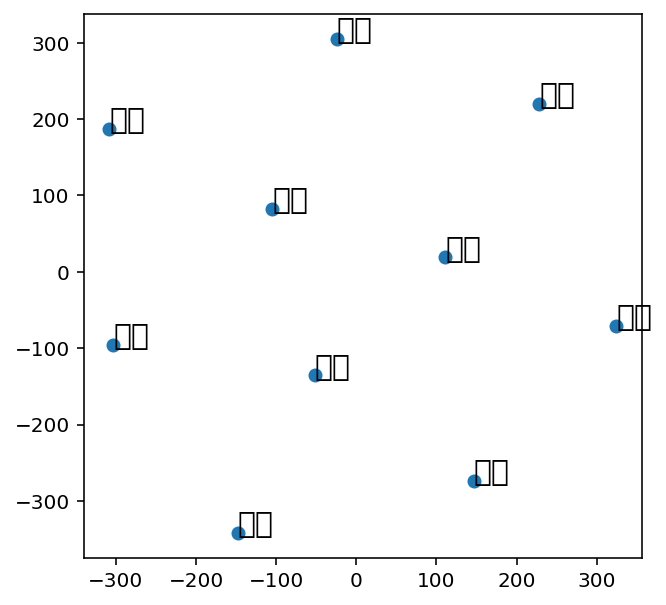

In [ ]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

fig = plt.figure()
fig.set_size_inches(5, 5)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos,fontsize=15)
    
plt.show()

In [ ]:
def encode_sentence_lstm(tokens, emb_size):
    vec = np.zeros((200, 170))
    #maxlen = 80이고 컬럼이 200?
    for i, word in enumerate(tokens):
        if i > 199:
            break
        try:
            vec[i] = embeddings.wv[word].reshape((1, emb_size))
        except KeyError:
            continue
    return vec

In [ ]:
from sklearn.model_selection import train_test_split

X = np.array([encode_sentence_lstm(ele, 200) for ele in map(lambda x: x, Text)])

train_text, test_text, train_senti, test_senti = train_test_split(X, y, stratify = y)

In [ ]:
train_text.shape

(459, 200, 200)

In [ ]:
print(len(train_text))
print(len(train_senti))
print(len(test_text))
print(len(test_senti))

459
459
153
153


In [ ]:
import keras.utils
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Input, Dense, LSTM, GRU, LeakyReLU, Dropout,Conv1D,MaxPooling1D
from keras.engine import Layer
from keras.models import Sequential, Model, load_model
from keras import backend as K
from keras.engine import Layer
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, LSTM, GRU, LeakyReLU, Dropout
from keras.layers import  Embedding, Bidirectional
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [ ]:
max_words = 450
max_len = 170
Batch_size = 32
Epochs = 50

In [ ]:
train_text.shape

(459, 200, 200)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200)]        0         
_________________________________________________________________
conv1d (Conv1D)              (None, 200, 64)           12864     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               819328    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0     

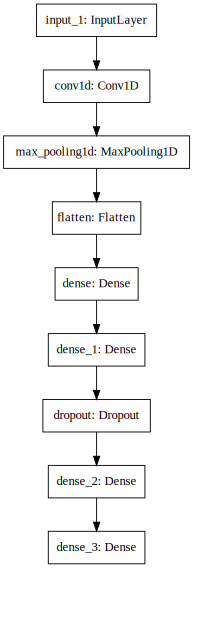

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
# create the model
input_tensor = Input(shape=(200,170))
embedding_vecor_length = 32
model = Sequential()
x = Conv1D(filters = 64, kernel_size = 1, strides = 1, padding = 'valid', activation = 'relu')(input_tensor)
x = MaxPooling1D(pool_size = 2)(x)
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation = 'relu')(x)



output_tensor = Dense(2, activation = 'softmax')(x)

model = Model(inputs = [input_tensor], outputs = [output_tensor])
model.summary()

from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg'))
# model.add(Embedding(input_dim= max_words,input_length = max_len))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))

# model.add(LSTM(256, dropout = 0.2))

# model.add(Dense(1, activation='sigmoid'))


# model.summary()


In [ ]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',  mode = 'min', patience = 10, verbose = 1)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_text, train_senti, epochs = Epochs, verbose=1, batch_size = Batch_size, validation_data = (test_text, test_senti), callbacks = [earlystopper])


Epoch 1/50
15/15 [==============================] - 2s 70ms/step - loss: 0.6861 - accuracy: 0.5982 - val_loss: 0.6909 - val_accuracy: 0.6013
Epoch 2/50
15/15 [==============================] - 0s 26ms/step - loss: 0.6282 - accuracy: 0.6721 - val_loss: 0.5758 - val_accuracy: 0.7778
Epoch 3/50
15/15 [==============================] - 0s 25ms/step - loss: 0.5398 - accuracy: 0.7845 - val_loss: 0.5250 - val_accuracy: 0.7386
Epoch 4/50
15/15 [==============================] - 0s 26ms/step - loss: 0.4739 - accuracy: 0.8152 - val_loss: 0.6878 - val_accuracy: 0.6667
Epoch 5/50
15/15 [==============================] - 0s 27ms/step - loss: 0.5103 - accuracy: 0.7851 - val_loss: 0.5216 - val_accuracy: 0.7451
Epoch 6/50
15/15 [==============================] - 0s 27ms/step - loss: 0.4156 - accuracy: 0.8424 - val_loss: 0.5480 - val_accuracy: 0.7516
Epoch 7/50
15/15 [==============================] - 0s 24ms/step - loss: 0.4059 - accuracy: 0.8425 - val_loss: 0.4789 - val_accuracy: 0.7843
Epoch 8/50
15

In [ ]:
print(test_text.shape)
print(len(test_senti))

(153, 200, 200)
153


In [ ]:
score, acc = model.evaluate(test_text, test_senti, verbose = 1)

5/5 [==============================] - 0s 7ms/step - loss: 0.5097 - accuracy: 0.7647


In [ ]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 0.5096980333328247
Test Accuracy: 0.7647058963775635


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


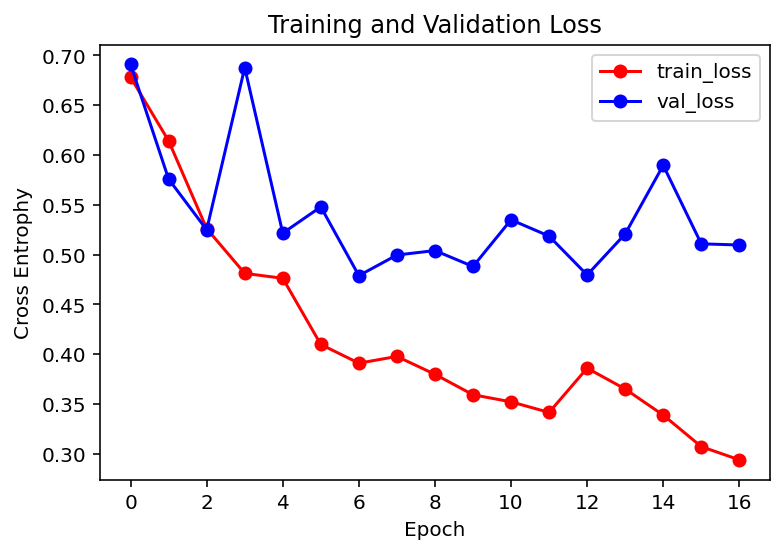

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label = 'train_loss')
plt.plot(val_loss, 'bo-', label = 'val_loss')
plt.ylabel('Cross Entrophy')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# doc = input()
# #엄마가 내몸을 만지고 아빠가 나를 때렸어요.

In [ ]:
# def sentiment_predict1(new_sentence):
#     if new_sentence != '':
#         new_sentence1 = text_cleaning(new_sentence)
#         new_sentence2 = text_tokenizing(new_sentence1)
#         new_sentence3 = [word for word in new_sentence2 if not word in SW] # 불용어 제거
#         if new_sentence3 != []:
#             X = np.array([encode_sentence_lstm(new_sentence3,200)])
#             pred_probs = model.predict(X) # 예측
            
#             categories = ['피해아동 학대 심각성 및 지속성','피해아동의 욕구 및 특성', '생활 환경']

#             N = len(categories)

#             values = np.round(pred_probs, 3).flatten().tolist()

            
#             plt.bar(categories, values)

#             plt.show()

In [ ]:
# sentiment_predict1(doc)

LSTM

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200)]        0         
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               935936    
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                1040

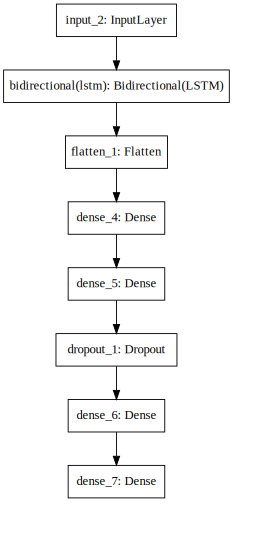

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Embedding, Dropout, MaxPooling1D
# create the model
input_tensor = Input(shape=(200,170))
embedding_vecor_length = 32
model = Sequential()
x = Bidirectional(LSTM(256))(input_tensor) # recurrent_dropout = 0.1
x = Flatten()(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation = 'relu')(x)



output_tensor = Dense(2, activation = 'softmax')(x)

model = Model(inputs = [input_tensor], outputs = [output_tensor])
model.summary()

from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg'))
# model.add(Embedding(input_dim= max_words,input_length = max_len))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))

# model.add(LSTM(256, dropout = 0.2))

# model.add(Dense(1, activation='sigmoid'))


# model.summary()


In [ ]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',  mode = 'min', patience = 10, verbose = 1)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_text, train_senti, epochs = Epochs, verbose=1, batch_size = Batch_size, validation_data = (test_text, test_senti), callbacks = [earlystopper])


Epoch 1/50
15/15 [==============================] - 20s 1s/step - loss: 0.6850 - accuracy: 0.5555 - val_loss: 0.7971 - val_accuracy: 0.4902
Epoch 2/50
15/15 [==============================] - 16s 1s/step - loss: 0.6615 - accuracy: 0.6160 - val_loss: 0.9242 - val_accuracy: 0.5098
Epoch 3/50
15/15 [==============================] - 16s 1s/step - loss: 0.7752 - accuracy: 0.5407 - val_loss: 0.6463 - val_accuracy: 0.7190
Epoch 4/50
15/15 [==============================] - 16s 1s/step - loss: 0.6177 - accuracy: 0.6884 - val_loss: 0.5352 - val_accuracy: 0.7712
Epoch 5/50
15/15 [==============================] - 16s 1s/step - loss: 0.5436 - accuracy: 0.7541 - val_loss: 0.5936 - val_accuracy: 0.7516
Epoch 6/50
15/15 [==============================] - 15s 1s/step - loss: 0.5328 - accuracy: 0.7429 - val_loss: 0.4894 - val_accuracy: 0.8105
Epoch 7/50
15/15 [==============================] - 15s 1s/step - loss: 0.5147 - accuracy: 0.7961 - val_loss: 0.5105 - val_accuracy: 0.8301
Epoch 8/50
15/15 [==

In [ ]:
score, acc = model.evaluate(test_text, test_senti, verbose = 1)

5/5 [==============================] - 1s 285ms/step - loss: 0.4926 - accuracy: 0.7908


In [ ]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 0.49257075786590576
Test Accuracy: 0.7908496856689453


LSTM + CNN

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 200, 200)]        0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 32)           19232     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 100, 32)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 512)               591872    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0   

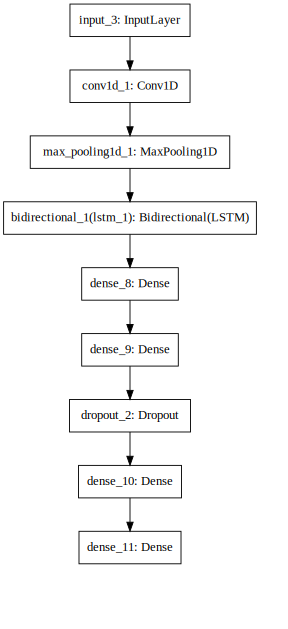

In [ ]:
# create the model
input_tensor = Input(shape=(200,170))
embedding_vecor_length = 32
model = Sequential()
x = Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu')(input_tensor)
x = MaxPooling1D(pool_size = 2)(x)
x = Bidirectional(LSTM(256, return_sequences = False))(x)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)


output_tensor = Dense(2, activation = 'softmax')(x)

model = Model(inputs = [input_tensor], outputs = [output_tensor])
model.summary()

from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(model, dpi=65).create(prog='dot', format='svg'))
# model.add(Embedding(input_dim= max_words,input_length = max_len))
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))

# model.add(LSTM(256, dropout = 0.2))

# model.add(Dense(1, activation='sigmoid'))


# model.summary()


In [ ]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',  mode = 'min', patience = 10, verbose = 1)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_text, train_senti, epochs = Epochs, verbose=1, batch_size = Batch_size, validation_data = (test_text, test_senti), callbacks = [earlystopper])


Epoch 1/50
15/15 [==============================] - 11s 487ms/step - loss: 0.6935 - accuracy: 0.5076 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 2/50
15/15 [==============================] - 7s 464ms/step - loss: 0.6926 - accuracy: 0.5512 - val_loss: 0.6906 - val_accuracy: 0.5098
Epoch 3/50
15/15 [==============================] - 7s 454ms/step - loss: 0.6777 - accuracy: 0.5647 - val_loss: 0.5945 - val_accuracy: 0.7255
Epoch 4/50
15/15 [==============================] - 7s 436ms/step - loss: 0.6717 - accuracy: 0.6364 - val_loss: 0.6933 - val_accuracy: 0.5033
Epoch 5/50
15/15 [==============================] - 7s 453ms/step - loss: 0.6951 - accuracy: 0.5064 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 6/50
15/15 [==============================] - 6s 431ms/step - loss: 0.6940 - accuracy: 0.5039 - val_loss: 0.6932 - val_accuracy: 0.4967
Epoch 7/50
15/15 [==============================] - 7s 447ms/step - loss: 0.7016 - accuracy: 0.5050 - val_loss: 0.6932 - val_accuracy: 0.5033
Epoch

In [ ]:
score, acc = model.evaluate(test_text, test_senti, verbose = 1)

5/5 [==============================] - 1s 145ms/step - loss: 0.6932 - accuracy: 0.4967


In [ ]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 0.6932292580604553
Test Accuracy: 0.49673202633857727


In [ ]:
pred = model.predict(test_text)

In [ ]:
len(pred)

153

In [ ]:
a = []
b = []
for i in pred:
  if i[0] >= 0.3:
    a.append(1)
  else: 
    a.append(0)
  if i[1] >= 0.3:
    b.append(1)
  else:
    b.append(0)

In [ ]:
pred[17]

array([0.5038244 , 0.49617565], dtype=float32)

In [ ]:
print(len(a))
print(len(b))

153
153


In [ ]:
s1 = pd.Series(a, name = '5점')
s2 = pd.Series(b, name = '6점')

In [ ]:
d1 = pd.concat([s1,s2], axis = 1)
print(d1)

     5점  6점
0     1   1
1     1   1
2     1   1
3     1   1
4     1   1
..   ..  ..
148   1   1
149   1   1
150   1   1
151   1   1
152   1   1

[153 rows x 2 columns]


In [ ]:
s1 = d1.sum(axis=1)
s1.unique()

array([2])

In [ ]:
df1 = pd.read_excel('gdrive/My Drive/pytest/실데이터.xlsx')
# 지정된 구글드라이브의 파일을 불러오기 

In [ ]:
df1.head()

,ID,비정형,아동 점수,학대행위자 점수
0,10301032017040012,\n- 친모는 아동이 자신의 자식이지만 조금만 더 성격을 고치면 괜찮은 아동인데 그...,2,1
1,80808082017040003,"\n\n- 아동가정 방문 당시, 피해아동(000,000)은 학교 하교 후 친구 집에...",3,1
2,10201022017040041,- 사실혼관계인 남자가 아동의 친모에게 칼을 들고 위협하여 아동이 신고한 사건으로 ...,3,2
3,10301032017040012,"\n1. 신고경위\n\n- 2016년 12월 12일, 아동 동생이 친부가 아동을 때...",2,1


In [ ]:
list2 = df1.values.tolist()


In [ ]:
train_data =[(text_tokenizing(text_cleaning(line[1])), line[3])for line in list2 if text_tokenizing(text_cleaning(line[1]))]


In [ ]:
train_data

[(['친모',
   '아동',
   '자신',
   '자식',
   '성격',
   '아동',
   '그것',
   '반항',
   '행동',
   '짜증',
   '입학',
   '학교',
   '반복',
   '대학교',
   '입학',
   '걱정',
   '상담원',
   '아동',
   '조사',
   '아동',
   '반성',
   '모습',
   '전달',
   '아동',
   '문제',
   '아동',
   '본인',
   '친모',
   '이야기',
   '아동',
   '친모',
   '모습',
   '걱정',
   '친모',
   '친부',
   '아동',
   '친오빠',
   '자식',
   '교육',
   '친모',
   '친모',
   '친부',
   '문제',
   '얘기',
   '본인',
   '아동',
   '문제',
   '아동',
   '본인',
   '개입',
   '친부',
   '아동',
   '친오빠',
   '연락',
   '부탁'],
  1),
 (['아동',
   '가정',
   '방문',
   '당시',
   '피해',
   '아동',
   '학교',
   '하교',
   '친구',
   '상태',
   '친모',
   '피해',
   '아동',
   '친정',
   '상태',
   '안산시',
   '아동',
   '보호',
   '전문',
   '기관',
   '상담원',
   '신고',
   '접수',
   '친모',
   '학대',
   '의심',
   '내용',
   '신고',
   '접수',
   '미명',
   '아동',
   '친부',
   '현장',
   '조사',
   '아동',
   '추가',
   '학대',
   '의심',
   '상황',
   '확인',
   '시경',
   '친부',
   '귀가',
   '자녀',
   '친모',
   '지인',
   '자녀',
   '보호자',
   '방치',
   '사실',
   '확인',
   '친부',
   '친모',
   '아동',
   '

In [ ]:
Text = []
for i in train_data:
  Text.append(i[0])

In [ ]:
Text

[['친모',
  '아동',
  '자신',
  '자식',
  '성격',
  '아동',
  '그것',
  '반항',
  '행동',
  '짜증',
  '입학',
  '학교',
  '반복',
  '대학교',
  '입학',
  '걱정',
  '상담원',
  '아동',
  '조사',
  '아동',
  '반성',
  '모습',
  '전달',
  '아동',
  '문제',
  '아동',
  '본인',
  '친모',
  '이야기',
  '아동',
  '친모',
  '모습',
  '걱정',
  '친모',
  '친부',
  '아동',
  '친오빠',
  '자식',
  '교육',
  '친모',
  '친모',
  '친부',
  '문제',
  '얘기',
  '본인',
  '아동',
  '문제',
  '아동',
  '본인',
  '개입',
  '친부',
  '아동',
  '친오빠',
  '연락',
  '부탁'],
 ['아동',
  '가정',
  '방문',
  '당시',
  '피해',
  '아동',
  '학교',
  '하교',
  '친구',
  '상태',
  '친모',
  '피해',
  '아동',
  '친정',
  '상태',
  '안산시',
  '아동',
  '보호',
  '전문',
  '기관',
  '상담원',
  '신고',
  '접수',
  '친모',
  '학대',
  '의심',
  '내용',
  '신고',
  '접수',
  '미명',
  '아동',
  '친부',
  '현장',
  '조사',
  '아동',
  '추가',
  '학대',
  '의심',
  '상황',
  '확인',
  '시경',
  '친부',
  '귀가',
  '자녀',
  '친모',
  '지인',
  '자녀',
  '보호자',
  '방치',
  '사실',
  '확인',
  '친부',
  '친모',
  '아동',
  '방치',
  '사실',
  '친모',
  '부부',
  '싸움',
  '고성',
  '아동',
  '노출',
  '친부',
  '에서',
  '자영업',
  '때문',
  '개월',
  '가량',
  '귀가'

In [ ]:
X = np.array([encode_sentence_lstm(ele, 170) for ele in map(lambda x: x, Text)])


In [ ]:
X

array([[[-0.1657016 , -0.07198703,  0.0691363 , ...,  0.06040903,
         -0.03797529, -0.02071434],
        [-0.30010596, -0.1307679 ,  0.09624145, ...,  0.09335908,
          0.01626857, -0.05383724],
        [-0.29713494, -0.12913804,  0.13715412, ...,  0.10727576,
         -0.07352692, -0.04086548],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[-0.30010596, -0.1307679 ,  0.09624145, ...,  0.09335908,
          0.01626857, -0.05383724],
        [-0.3013427 , -0.1273849 ,  0.1328927 , ...,  0.11305472,
         -0.0612813 , -0.04332109],
        [-0.29238507, -0.1295522 ,  0.12677366, ...,  0.10694855,
         -0.06185874, -0.03853706],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [ ]:
Senti = []
for i in train_data:
  Senti.append(i[1])

In [ ]:
Senti

[1, 1, 2, 1]

In [ ]:
pred1 = model.predict(X)

In [ ]:
pred1

array([[0.50383204, 0.496168  ],
       [0.50383466, 0.4961653 ],
       [0.5038301 , 0.49616984],
       [0.5038334 , 0.49616662]], dtype=float32)

In [ ]:
a = []
b = []
for i in pred1:
  if i[0] >= 0.3:
    a.append(1)
  else: 
    a.append(0)
  if i[1] >= 0.3:
    b.append(1)
  else:
    b.append(0)

s1 = pd.Series(a, name = '5점')
s2 = pd.Series(b, name = '6점')

In [ ]:
d1 = pd.concat([s1,s2], axis = 1)
s1 = d1.sum(axis=1)

In [ ]:
s1 senti 

SyntaxError: ignored